## EDA 위해 데이터 불러오는 것 까지만 되어있는 base라인 코드입니다.
이 파일을 복사해서 각자 EDA 해주시면 될 것 같아요.

## Font 설치. 이거 돌리고 세션 재시작 해야함

###  Font 설치, 설치 후 코랩 런타임 재시작 해주세요

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### Font 및 그래프 스타일 설정

In [2]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
plt.rc('font', family='NanumBarunGothic')

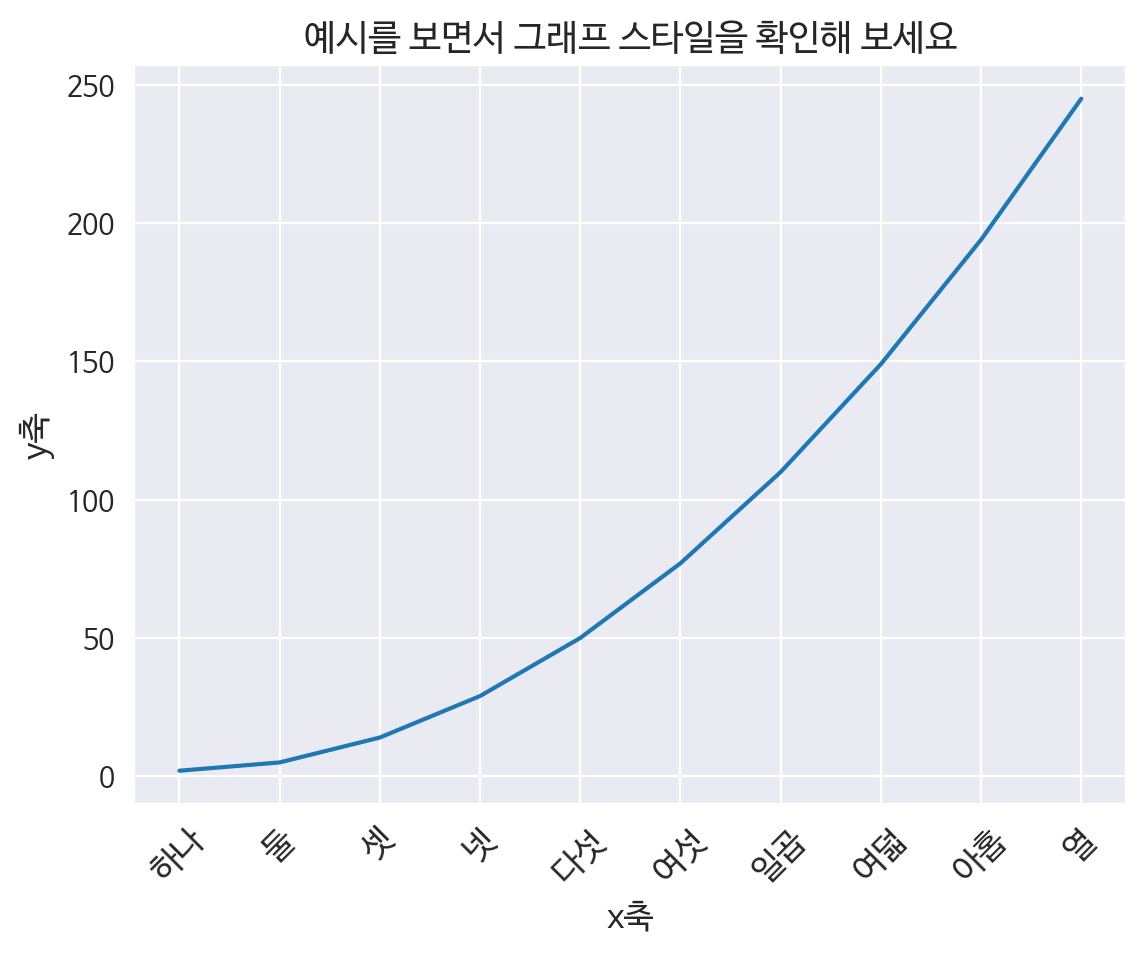

In [3]:
# 예시 그림

import numpy as np

plt.plot([x for x in range(0, 10)], [(3*y**2)+2 for y in range(0, 10)])
plt.title("예시를 보면서 그래프 스타일을 확인해 보세요", fontsize= 13)
plt.xlabel("x축", fontsize= 12)
plt.xticks(np.arange(0, 10, 1), ['하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열'], fontsize= 12, rotation= 45)
plt.ylabel("y축", fontsize= 12)
plt.show()

## Data 불러오기

In [4]:
def initialize_resource_paths():
    import os

    # 코랩 mount
    from google.colab import drive
    drive.mount('/content/drive')

    root_directory = '/content/drive/MyDrive/Dataset/'


    """
    원하는 데이터셋은 여기에 추가시키면 돼요
    파일 3개가 뭔차인지 몰라서 이렇게...
    """
    output = dict()
    output['dataset1'] = os.path.join(root_directory, '(자동차보험) 고객별 사고 발생률 예측 모델링_1.csv')
    output['dataset2'] = os.path.join(root_directory, '(자동차보험) 고객별 사고 발생률 예측 모델링_2.csv')
    output['dataset3'] = os.path.join(root_directory, '(자동차보험) 고객별 사고 발생률 예측 모델링_3.csv')


    return output



In [5]:
resource_paths = initialize_resource_paths()

Mounted at /content/drive


In [6]:
def read_user_enriched(input):
    import pandas as pd

    output = pd.read_csv(input, sep=',', encoding = "cp949", engine='python')

    return output

In [7]:
# 불러온 데이터 용량 확인
# 용량이 적당히 크면 잘 불러왔다고  생각가능.
dataset1 = read_user_enriched(resource_paths['dataset1'])
dataset2 = read_user_enriched(resource_paths['dataset2'])
dataset3 = read_user_enriched(resource_paths['dataset3'])
# display('RAM memory usage: {} bytes'.format(datasets.memory_usage().sum()))



#### 데이터셋 3개 합치기

In [8]:
import pandas as pd

In [9]:
## 1번째 데이터는 행과 열이 엑셀 전체값이 들어가있어 null 값제거를 한번 해줬다.

df1 = dataset1.iloc[:, :15].dropna()
df1.shape

(105736, 15)

In [10]:
dataset2.shape

(102726, 15)

In [11]:
dataset3.shape

(59234, 15)

In [12]:
# 컬럼 다 합치기

df = pd.concat([df1, dataset2, dataset3], ignore_index=True)
df['YUHO'] = df['YUHO'].str.replace(',', '').astype(int)
df['SAGO'] = df['SAGO'].apply(lambda x: int(float(str(x).replace(',', '').split('.')[0])))
df['SAGO'] = df['SAGO'].replace(',', '').astype(int)
df['사고율'] = df.apply(lambda row: 0 if row['YUHO'] == 0 else row['SAGO'] / row['YUHO'], axis=1)


# 변수 이름 변경
df.rename(columns={
    'ZCPRLCLCD': '자동차',
    'ZINSRDAVL': '연령대',
    'ZIOSEXCD': '성별',
    'ZDPRODSCD': '국산구분코드',
    'NCR': '직전3년간사고건수',
    'ZCARPSGVL': '차량경과년수',
    '차종': '배기량별차종',
    'ZDRVLISCD': '운전자한정특별약관코드',
    'ZDRVLISCD___T': '운전자한정특별약관',
    'ZENTCARCD': '가입경력코드',
    'ZCARISDAM': '차량가입금액',
    'ZIMAGERVL': '영상기록장치특약',
    '마일리지약정거리': '마일리지특약',
    'YUHO': '유효대수',
    'SAGO': '사고건수'
}, inplace=True)


# '사고유무' 열 생성
df['사고유무'] = df['사고건수'].apply(lambda x: 0 if x == 0 else 1)

mapping = {'N': 0, 'D': 1, 'C': 2, 'B': 3, 'Z': '기타', '0':'결측치'}
df['직전3년간사고건수'] = df['직전3년간사고건수'].replace(mapping)
df

,자동차,연령대,성별,국산구분코드,직전3년간사고건수,차량경과년수,배기량별차종,운전자한정특별약관코드,운전자한정특별약관,가입경력코드,차량가입금액,영상기록장치특약,마일리지특약,유효대수,사고건수,사고율,사고유무
0,A10,0.0,1.0,1.0,0,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0,0.000000,0
1,A10,0.0,1.0,1.0,기타,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0,0.000000,0
2,A10,0.0,1.0,1.0,기타,10년이하,중형,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0,0.000000,0
3,A10,0.0,1.0,1.0,기타,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,5천만원이하,미가입,미가입,0,0,0.000000,0
4,A10,0.0,2.0,1.0,0,5년이하,중형,1.0,누구나(기본),4.0,5천만원이하,가입,미가입,1,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267691,A10,40.0,2.0,1.0,2,10년이상,중형,1.0,누구나(기본),8.0,미가입,미가입,7000K,0,0,0.000000,0
267692,A10,40.0,2.0,1.0,2,5년이하,소형A,12.0,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0,0.000000,0
267693,A10,40.0,2.0,1.0,2,10년이하,소형A,4.0,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1,0.166667,1
267694,A10,40.0,2.0,1.0,2,5년이하,소형B,1.0,누구나(기본),7.0,5천만원이하,가입,미가입,0,0,0.000000,0


## 3월 25일

In [21]:

remove_column_df1 = df.drop(columns=['연령대', '성별'])
remove_column_df2 = df.drop(columns=['연령대', '성별', '가입경력코드'])

# 중복된 행 여부를 나타내는 새로운 열 생성
remove_column_df1['중복여부'] = remove_column_df1.duplicated(keep=False)
remove_column_df2['중복여부'] = remove_column_df2.duplicated(keep=False)

remove_column_df1 = pd.concat([df[['연령대', '성별']], remove_column_df1], axis=1)
remove_column_df2 = pd.concat([df[['연령대', '성별', '가입경력코드']], remove_column_df2], axis=1)

a = remove_column_df1[remove_column_df1['중복여부']==True]
b = remove_column_df2[remove_column_df2['중복여부']==True]


print("----성별, 연령대 제거 후 중복된 값.--------------------------")
print("총: ", len(a))
print(a['연령대'].value_counts())


print("----성별, 연령대, 가입보험 제거 후 중복된 값.--------------------------")
print("총: ", len(b))
print(b['연령대'].value_counts())

----성별, 연령대 제거 후 중복된 값.--------------------------
총:  129329
40.0     29120
30.0     28943
50.0     24273
60.0     18667
20.0     16634
70.0      8641
80.0      2639
90.0       312
10.0        86
100.0        8
0.0          6
Name: 연령대, dtype: int64
----성별, 연령대, 가입보험 제거 후 중복된 값.--------------------------
총:  195007
30.0     51044
40.0     43281
50.0     33180
20.0     26129
60.0     24931
70.0     11811
80.0      4000
90.0       508
10.0       106
100.0       11
0.0          6
Name: 연령대, dtype: int64


In [40]:
b1 = remove_column_df2[remove_column_df2['중복여부']==True]
b2 = remove_column_df2[remove_column_df2['중복여부']==False]


b1.sort_values(by=['유효대수', '운전자한정특별약관', '직전3년간사고건수','영상기록장치특약','마일리지특약', '국산구분코드', '차량경과년수','차량가입금액', '배기량별차종', '연령대', '성별'], ascending=[False, False, True, True, True, True, True, True, True, True, True])

,연령대,성별,가입경력코드,자동차,국산구분코드,직전3년간사고건수,차량경과년수,배기량별차종,운전자한정특별약관코드,운전자한정특별약관,차량가입금액,영상기록장치특약,마일리지특약,유효대수,사고건수,사고율,사고유무,중복여부
245185,40.0,1.0,4.0,A10,1.0,0,10년이하,소형B,4.0,기명피보험자1인한정,5천만원이하,가입,15000K,56,10,0.178571,1,True
113812,40.0,2.0,5.0,A10,1.0,0,10년이하,소형B,4.0,기명피보험자1인한정,5천만원이하,가입,15000K,56,10,0.178571,1,True
244494,40.0,1.0,8.0,A10,1.0,0,10년이상,소형A,4.0,기명피보험자1인한정,미가입,미가입,미가입,55,11,0.200000,1,True
142686,50.0,1.0,8.0,A10,1.0,0,10년이상,소형A,4.0,기명피보험자1인한정,미가입,미가입,미가입,55,11,0.200000,1,True
240960,40.0,1.0,7.0,A10,1.0,1,5년이하,소형B,4.0,기명피보험자1인한정,5천만원이하,가입,15000K,52,13,0.250000,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130797,40.0,2.0,8.0,A10,2.0,기타,신차,중형,12.0,부부 및 자녀한정,5천만원이하,미가입,미가입,0,0,0.000000,0,True
199192,60.0,1.0,1.0,A10,2.0,기타,신차,중형,12.0,부부 및 자녀한정,5천만원이하,미가입,미가입,0,0,0.000000,0,True
180689,50.0,2.0,8.0,A10,2.0,기타,신차,대형,12.0,부부 및 자녀한정,미가입,미가입,미가입,0,0,0.000000,0,True
199548,60.0,1.0,1.0,A10,2.0,기타,신차,대형,12.0,부부 및 자녀한정,미가입,미가입,미가입,0,0,0.000000,0,True


In [26]:
b2.sort_values(by=['운전자한정특별약관', '연령대'])

,연령대,성별,가입경력코드,자동차,국산구분코드,직전3년간사고건수,차량경과년수,배기량별차종,운전자한정특별약관코드,운전자한정특별약관,차량가입금액,영상기록장치특약,마일리지특약,유효대수,사고건수,사고율,사고유무,중복여부
40511,30.0,1.0,8.0,A10,1.0,0,5년이하,대형,12.0,부부 및 자녀한정,5천만원이하,가입,15000K,0,1,0.0,1,False
43204,30.0,1.0,8.0,A10,1.0,0,10년이하,중형,12.0,부부 및 자녀한정,5천만원이하,가입,12000K,0,0,0.0,0,False
71931,30.0,2.0,7.0,A10,1.0,0,신차,다목적2종,12.0,부부 및 자녀한정,5천만원이하,가입,15000K,1,1,1.0,1,False
78094,30.0,2.0,8.0,A10,1.0,0,10년이하,다목적2종,12.0,부부 및 자녀한정,5천만원이하,가입,미가입,0,1,0.0,1,False
99913,40.0,1.0,8.0,A10,1.0,3,10년이하,소형B,12.0,부부 및 자녀한정,5천만원이하,가입,미가입,0,0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238790,80.0,2.0,8.0,A10,2.0,1,5년이하,대형,11.0,임직원한정,5천만원이하,가입,미가입,0,1,0.0,1,False
239126,80.0,2.0,8.0,A10,2.0,0,10년이상,대형,11.0,임직원한정,5천만원이하,미가입,15000K,0,1,0.0,1,False
239227,80.0,2.0,8.0,A10,2.0,0,5년이하,다목적2종,11.0,임직원한정,5천만원이하,가입,미가입,0,0,0.0,0,False
239329,80.0,2.0,8.0,A10,2.0,0,5년이하,대형,11.0,임직원한정,5천만원이하,가입,15000K,0,1,0.0,1,False


In [17]:
for column in duplicates.columns:
    print(f"Column '{column}':")
    print(duplicates[column].value_counts())
    print()

Column '자동차':
A10    79238
Name: 자동차, dtype: int64

Column '국산구분코드':
1.0    51715
2.0    27500
Name: 국산구분코드, dtype: int64

Column '직전3년간사고건수':
0     25731
기타    23022
1     15593
2      9085
3      5807
Name: 직전3년간사고건수, dtype: int64

Column '차량경과년수':
5년이하     24670
10년이하    23040
10년이상    19010
신차       12518
Name: 차량경과년수, dtype: int64

Column '배기량별차종':
대형       22518
중형       21589
소형B      15119
다목적2종    10398
소형A       9605
다목적1종        9
Name: 배기량별차종, dtype: int64

Column '운전자한정특별약관코드':
4.0     19814
3.0     15447
1.0     12612
2.0     11549
7.0      9406
5.0      5287
12.0     3742
11.0     1380
6.0         1
Name: 운전자한정특별약관코드, dtype: int64

Column '운전자한정특별약관':
기명피보험자1인한정      19814
부부한정            15447
누구나(기본)         12612
가족한정(형제자매제외)    11549
1인 및 지정1인        9406
가족및형제자매한정        5287
 부부 및 자녀한정       3742
임직원한정            1380
가족 및 지정1인           1
Name: 운전자한정특별약관, dtype: int64

Column '가입경력코드':
8.0    27614
7.0     9520
6.0     9285
5.0     8859
4.0     8399
3.0     6836
2

## 3월 24일


In [ ]:
df.columns

Index(['자동차', '연령대', '성별', '국산구분코드', '직전3년간사고건수', '차량경과년수', '배기량별차종',
       '운전자한정특별약관코드', '운전자한정특별약관', '가입경력코드', '차량가입금액', '영상기록장치특약', '마일리지특약',
       '유효대수', '사고건수', '사고율', '사고유무'],
      dtype='object')

In [ ]:
from scipy.stats import chi2_contingency

# 카이제곱 독립성 검정을 위한 함수 정의
def calculate_chi2(dataframe, column1, column2):
    # 카이제곱 독립성 검정을 위해 contingency table 생성
    contingency_table = pd.crosstab(dataframe[column1], dataframe[column2])
    # 카이제곱 독립성 검정 수행
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    alpha = 0.05

    print(f"p-value: {p:.2e}, \t 카이제곱 통계량: {chi2}")

    if p < alpha:
        pass
        # 결과 출력
        # display(contingency_table)
        # print(f"컬럼값1: {column1}, 컬럼값2: {column2}" )
        # print("카이제곱 통계량: ", chi2)
        # print('p-value: ', p)
        # print("Degrees of freedom:", dof)
        # print("결론: 귀무가설 기각. 변수 간에는 연관이 있습니다.")

        return chi2, f'{p:.2e}', dof
    else:
        pass
        #결과 출력
        # display(contingency_table)
        # print(f"컬럼값1: {column1}, 컬럼값2: {column2}" )
        # print("카이제곱 통계량: ", chi2)
        # print('p-value:', p)
        # print("Degrees of freedom:", dof)
        # print("결론: 귀무가설 기각하지 않음. 변수 간에는 유의한 연관이 없습니다.")

        return chi2, p, '가설기각안함'
    # print("\n")

    # # print("Expected frequencies table:")
    # print(expected)
    # print("-------------------------------------------------------------------")
    # print()




In [ ]:
# 데이터프레임에서 카이제곱 통계량 확인

features = ['연령대', '성별', '국산구분코드', '직전3년간사고건수', '차량경과년수', '배기량별차종',
       '운전자한정특별약관코드', '운전자한정특별약관', '가입경력코드', '차량가입금액', '영상기록장치특약', '마일리지특약']

targets= ['사고유무']

data1= {'행이름': ['카이제곱통계량', 'p-value', '가설'],}

data = []

for feature in features:
  for target in targets:
      chi, p, dof = calculate_chi2(df, target, feature)
      p = str(p)
      data.append((feature, p, chi,dof))




sorted_data = sorted(data, key=lambda x: x[1])

print("----------------------")
# data1.update(sorted_data)



data1

df2 = pd.DataFrame(data1)
df2 = df2.round(2)
df2





# df5 = df[df[

# AA.sort(key=lambda x:x[1], reverse=False)

df4 = pd.DataFrame(sorted_data, columns=['Column', 'p-value', '카이제곱통계량', '자유도'])
df4

p-value: 3.61e-224, 	 카이제곱 통계량: 1072.9302387845669
p-value: 6.37e-94, 	 카이제곱 통계량: 422.680955273285
p-value: 0.00e+00, 	 카이제곱 통계량: 1426.0018512511297
p-value: 2.18e-174, 	 카이제곱 통계량: 817.2168646066882
p-value: 5.38e-146, 	 카이제곱 통계량: 675.055095926544
p-value: 2.66e-101, 	 카이제곱 통계량: 479.0414111444833
p-value: 0.00e+00, 	 카이제곱 통계량: 3075.9731927842845
p-value: 0.00e+00, 	 카이제곱 통계량: 3075.973192784284
p-value: 0.00e+00, 	 카이제곱 통계량: 6906.784170975481
p-value: 0.00e+00, 	 카이제곱 통계량: 6572.670996676354
p-value: 2.25e-135, 	 카이제곱 통계량: 613.1990870129943
p-value: 0.00e+00, 	 카이제곱 통계량: 2538.588061800024
----------------------


,Column,p-value,카이제곱통계량,자유도
0,국산구분코드,0.00e+00,1426.001851,1
1,운전자한정특별약관코드,0.00e+00,3075.973193,9
2,운전자한정특별약관,0.00e+00,3075.973193,9
3,가입경력코드,0.00e+00,6906.784171,7
4,차량가입금액,0.00e+00,6572.670997,3
5,마일리지특약,0.00e+00,2538.588062,6
6,직전3년간사고건수,2.18e-174,817.216865,5
7,영상기록장치특약,2.25e-135,613.199087,1
8,배기량별차종,2.66e-101,479.041411,5
9,연령대,3.61e-224,1072.930239,10


In [ ]:
for feature in features:
  for target in targets:
      calculate_chi22(df, target, feature)


p-value: 3.61e-224
p-value: 6.37e-94


ValueError: The internally computed table of expected frequencies has a zero element at (0, 2).

In [ ]:
from scipy.stats import f_oneway


AA = []

def one_way_anova_for_all_columns(dataframe, dependent_column):
    # 종속변수 열 선택

    dependent_data = dataframe[dependent_column]

    # columns = ['ZINSRDAVL', 'ZIOSEXCD', 'ZDPRODSCD', 'NCR', 'ZCARPSGVL',
    #    '차종', 'ZDRVLISCD', 'ZDRVLISCD___T', 'ZENTCARCD', 'ZCARISDAM',
    #    'ZIMAGERVL', '마일리지약정거리']
    # 각 독립변수 열에 대해 One-way ANOVA 수행
    for column in features:

            categories = dataframe[column].unique()  # 해당 컬럼의 고유값 추출
            print(f"=== {column}에 대한 ANOVA ===")
            for category in categories:
                group = dataframe[dataframe[column] == category]['사고율']
                print(f"{column}이 {category}인 경우의 평균: {group.mean()}")
            # ANOVA 실행
            try:
              f_statistic, p_value = f_oneway(*[dataframe[dataframe[column] == category]['사고율'] for category in categories])
              print(f"F-statistic: {f_statistic}")
              print(f"P-value: {p_value}")
              if p_value < 0.05:
                  print("결과: 그룹 간에는 평균 차이가 통계적으로 유의미합니다.\n")
              else:
                  print("결과: 그룹 간에는 평균 차이가 통계적으로 유의미하지 않습니다.\n")

              AA.append((column, p_value))
            except Exception as e:
              print("###################################################################################error: 컬렴명 ", column)
              print("error: ", e)

            print()
            print()

# 데이터프레임의 각 열에 대해 One-way ANOVA 수행

# dataset = pd.get_dummies(datasets,columns = ['ZINSRDAVL', 'ZIOSEXCD', 'ZDPRODSCD', 'NCR', 'ZCARPSGVL',
#        '차종', 'ZDRVLISCD', 'ZDRVLISCD___T', 'ZENTCARCD', 'ZCARISDAM',
#        'ZIMAGERVL', '마일리지약정거리'] )

df5 = df[df['국산구분코드'].isin([1, 2])]

one_way_anova_for_all_columns(df5, '사고율')

AA.sort(key=lambda x:x[1], reverse=False)

df4 = pd.DataFrame(AA, columns=['Column', 'p-value'])
df4

=== 연령대에 대한 ANOVA ===
연령대이 0.0인 경우의 평균: 0.0
연령대이 10.0인 경우의 평균: 0.02727272727272727
연령대이 20.0인 경우의 평균: 0.15533838443522863
연령대이 30.0인 경우의 평균: 0.17156501607752386
연령대이 40.0인 경우의 평균: 0.1646250732339784
연령대이 50.0인 경우의 평균: 0.172652728230739
연령대이 60.0인 경우의 평균: 0.17141416492518083
연령대이 70.0인 경우의 평균: 0.18254459090728634
연령대이 80.0인 경우의 평균: 0.17736299525278557
연령대이 90.0인 경우의 평균: 0.07533206831119545
연령대이 100.0인 경우의 평균: 0.0
F-statistic: 11.648842860486901
P-value: 2.6349421212588777e-20
결과: 그룹 간에는 평균 차이가 통계적으로 유의미합니다.



=== 성별에 대한 ANOVA ===
성별이 1.0인 경우의 평균: 0.17100810062773822
성별이 2.0인 경우의 평균: 0.1670999803865689
F-statistic: 6.321175170985827
P-value: 0.011931035475541037
결과: 그룹 간에는 평균 차이가 통계적으로 유의미합니다.



=== 국산구분코드에 대한 ANOVA ===
국산구분코드이 1.0인 경우의 평균: 0.17890090455959426
국산구분코드이 2.0인 경우의 평균: 0.14900157573122982
F-statistic: 332.0083554394016
P-value: 3.893384373117258e-74
결과: 그룹 간에는 평균 차이가 통계적으로 유의미합니다.



=== 직전3년간사고건수에 대한 ANOVA ===
직전3년간사고건수이 0인 경우의 평균: 0.14213887386264842
직전3년간사고건수이 기타인 경우의 평균

,Column,p-value
0,차량가입금액,0.000000e+00
1,직전3년간사고건수,1.854699e-304
2,가입경력코드,8.965100e-198
3,운전자한정특별약관코드,2.905552e-153
4,운전자한정특별약관,2.905552e-153
5,마일리지특약,3.830843e-142
6,국산구분코드,3.893384e-74
7,차량경과년수,1.222558e-65
8,배기량별차종,4.927461e-58
9,연령대,2.634942e-20


In [ ]:
cross_table = pd.crosstab(df['연령대'], df['직전3년간사고건수'])

cross_table

직전3년간사고건수,0,1,2,3,결측치,기타
연령대,,,,,,
0.0,2,0,0,0,0,4
10.0,18,7,3,0,0,82
20.0,10405,5680,2772,1517,1,9057
30.0,22418,14398,8523,5509,3,18760
40.0,20401,12654,7376,4628,4,16267
50.0,16463,9994,5899,3943,8,12015
60.0,12780,7867,4646,3054,8,8366
70.0,6094,3857,2242,1338,1,3128
80.0,2010,1303,647,360,0,646


In [ ]:
# 각 범주형 열과 '사고유무' 열 간에 카이제곱 검정 수행


rank_categories = ['연령대', '직전3년간사고건수', '차량경과년수', '가입경력코드', '차량가입금액', '영상기록장치특약', '마일리지특약']


for column in df.columns[:-1]:  # '사고유무' 열을 제외한 모든 열에 대해 반복
    contingency_table = pd.crosstab(df[column], df['사고유무'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # 결과 출력
    print(f"카이제곱 검정 결과 - {column}:")
    print(f"  p-value: {p}")
    if p < 0.05:  # 유의수준 0.05에서 검정
        print("  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.")
    else:
        print("  귀무가설을 기각할 수 없습니다. 두 열 간에는 통계적으로 유의한 관련성이 없습니다.")
    print()

카이제곱 검정 결과 - 자동차:
  p-value: 1.0
  귀무가설을 기각할 수 없습니다. 두 열 간에는 통계적으로 유의한 관련성이 없습니다.

카이제곱 검정 결과 - 연령대:
  p-value: 3.608758780481175e-224
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 성별:
  p-value: 6.366621220618471e-94
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 국산구분코드:
  p-value: 0.0
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 직전3년간사고건수:
  p-value: 2.180372493325129e-174
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 차량경과년수:
  p-value: 5.381458853079437e-146
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 배기량별차종:
  p-value: 2.6642476033064165e-101
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 운전자한정특별약관코드:
  p-value: 0.0
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 운전자한정특별약관:
  p-value: 0.0
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 가입경력코드:
  p-value: 0.0
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 결과 - 차량가입금액:
  p-value: 0.0
  귀무가설을 기각합니다. 두 열 간에는 통계적으로 유의한 관련성이 있습니다.

카이제곱 검정 

Text(0, 0.5, '비율')

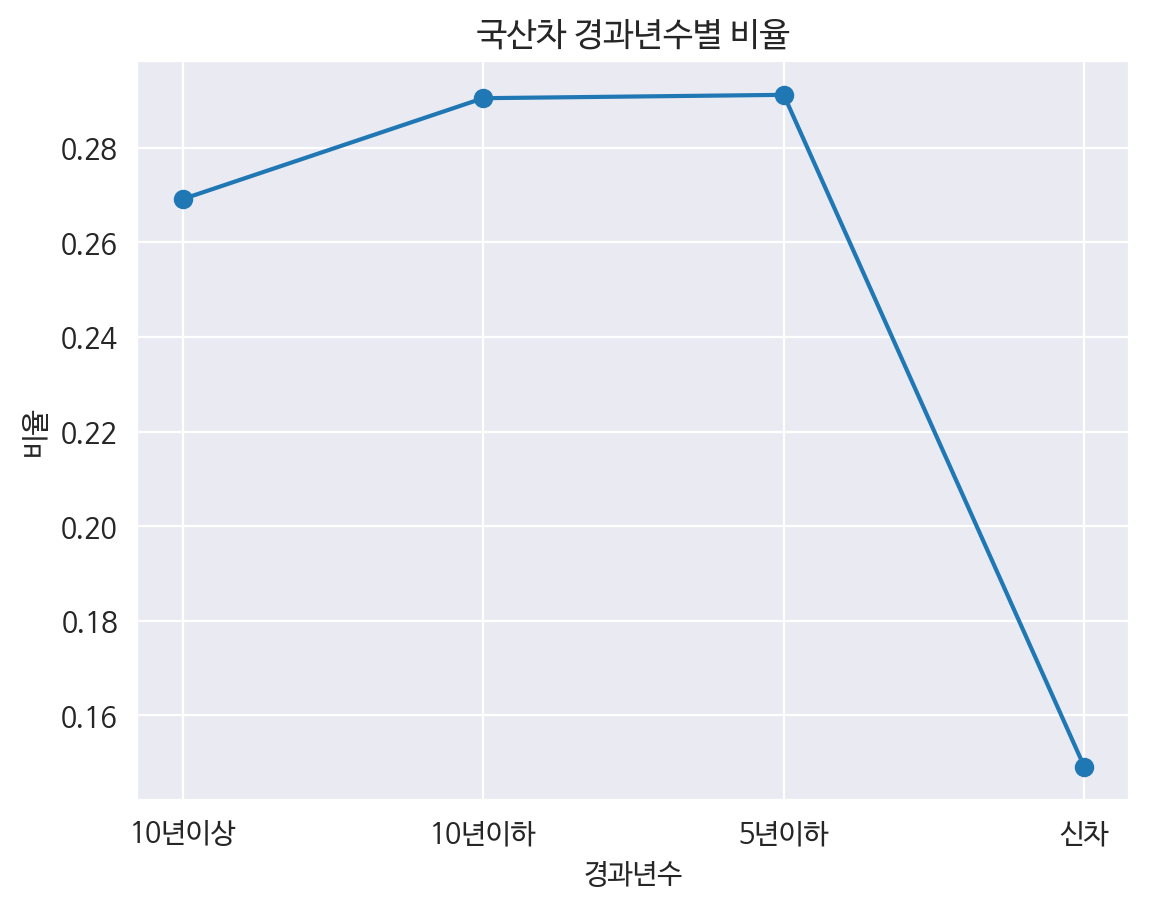

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 국산차만 필터링
domestic_cars = df[df['국산구분코드'] == 1]

# 경과년수별 국산차의 수 계산
year_counts = domestic_cars['차량경과년수'].value_counts().sort_index()

# 경과년수별 비율 계산
year_percentages = year_counts / year_counts.sum()

# 꺾은선 그래프 그리기
plt.plot(year_percentages.index, year_percentages.values, marker='o')

# 그래프 제목과 축 라벨 추가
plt.title('국산차 경과년수별 비율')
plt.xlabel('경과년수')
plt.ylabel('비율')

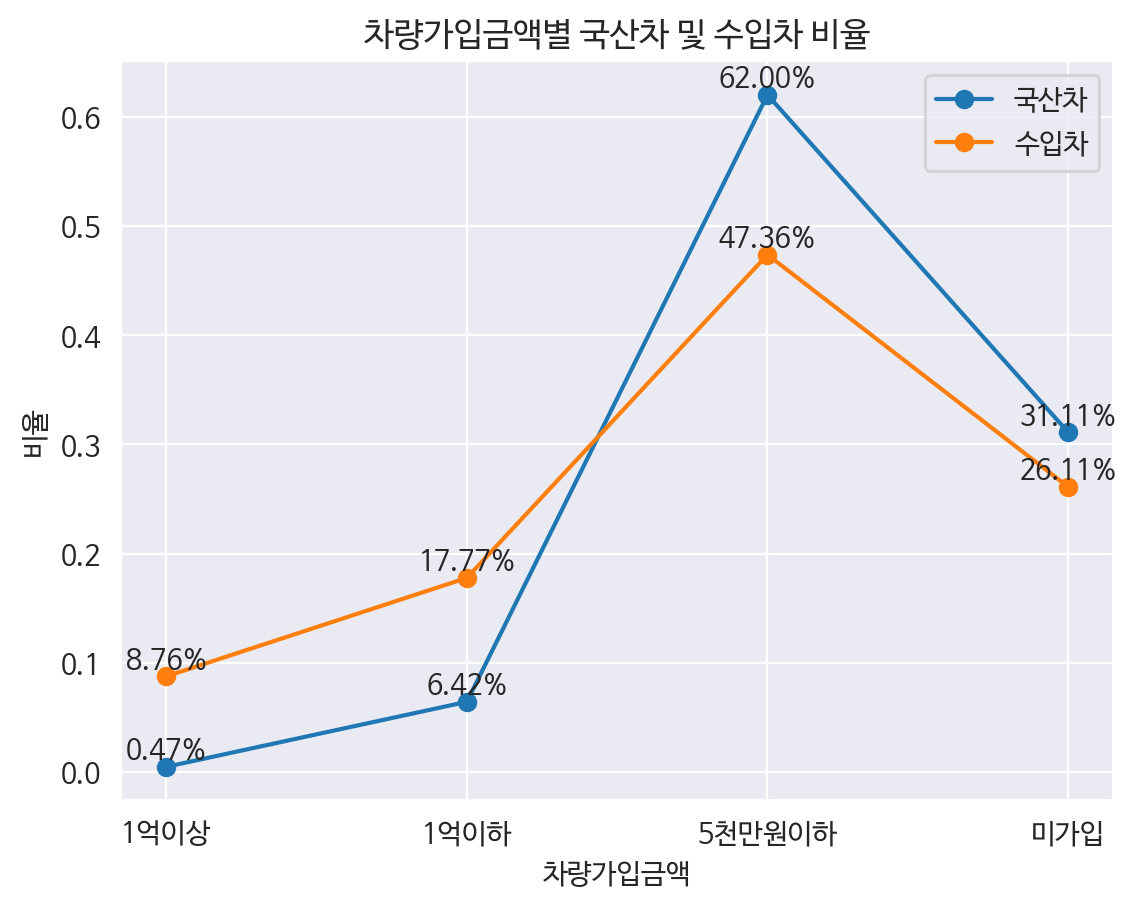

In [ ]:
# 국산차와 수입차로 데이터 분리
domestic_cars = df[df['국산구분코드'] == 1]
imported_cars = df[df['국산구분코드'] == 2]

# 경과년수별 국산차와 수입차의 수 계산
domestic_year_counts = domestic_cars['차량가입금액'].value_counts().sort_index()
imported_year_counts = imported_cars['차량가입금액'].value_counts().sort_index()

# 경과년수별 국산차와 수입차의 비율 계산
domestic_year_percentages = domestic_year_counts / domestic_year_counts.sum()
imported_year_percentages = imported_year_counts / imported_year_counts.sum()




# 꺾은선 그래프 그리기
plt.plot(domestic_year_percentages.index, domestic_year_percentages.values, marker='o', label='국산차')
plt.plot(imported_year_percentages.index, imported_year_percentages.values, marker='o', label='수입차')

# # 각 데이터 포인트 위에 정확한 값(비율) 표시
for x, y in zip(domestic_year_percentages.index, domestic_year_percentages.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom')
for x, y in zip(imported_year_percentages.index, imported_year_percentages.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom')


# 그래프 제목과 축 라벨 추가
plt.title('차량가입금액별 국산차 및 수입차 비율')
plt.xlabel('차량가입금액')
plt.ylabel('비율')
plt.legend()  # 범례 표시

# 그래프 표시
plt.show()

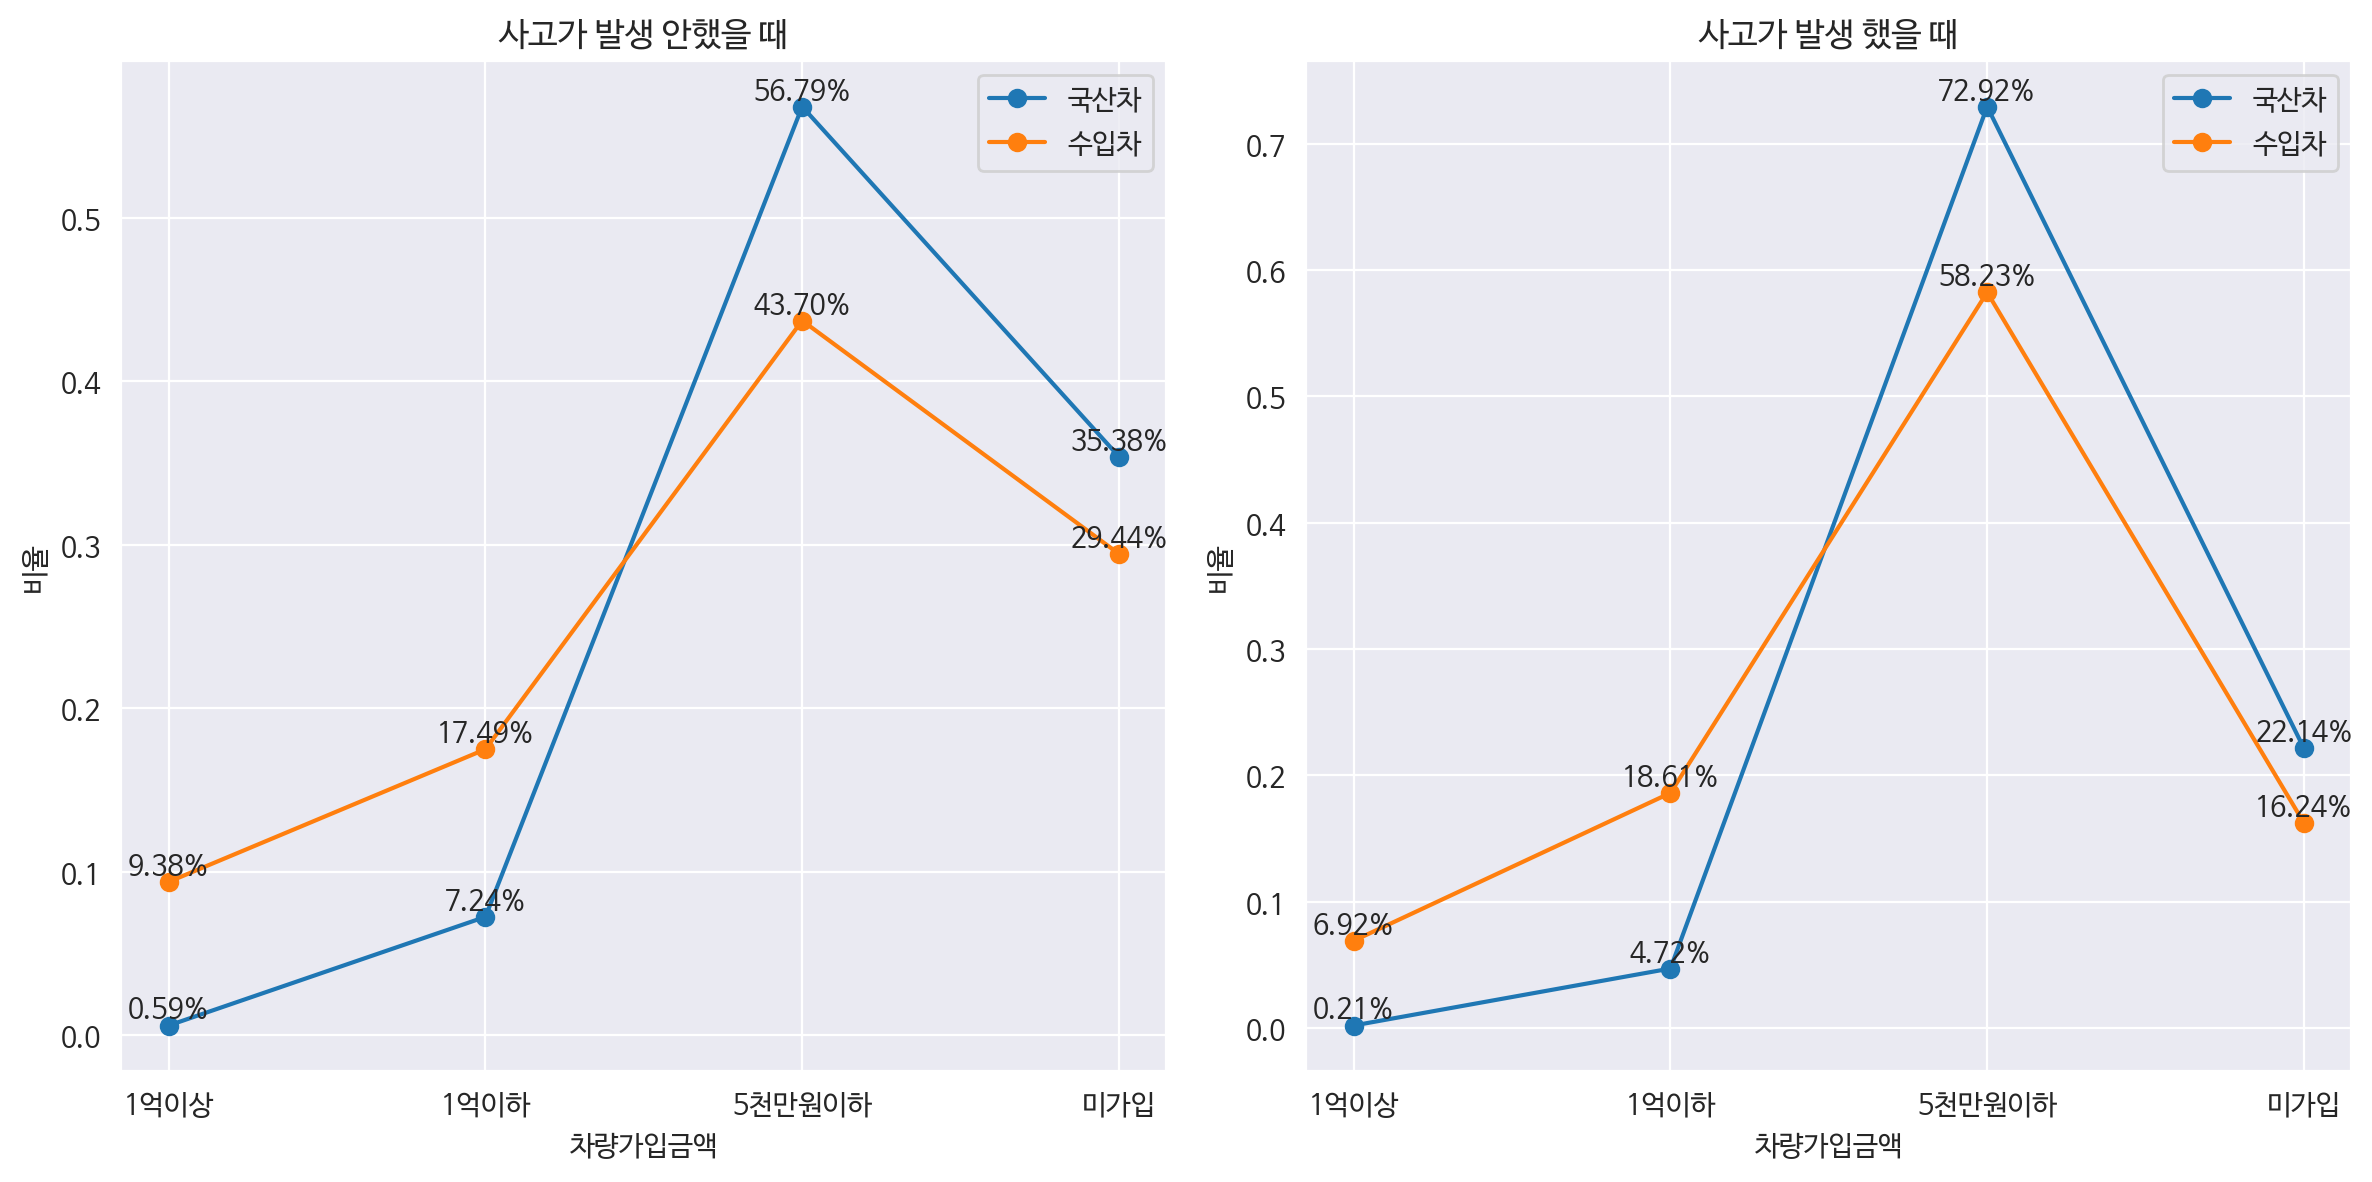

In [ ]:
# 사고유무가 0일 때
accident_0 = df[df['사고유무'] == 0]
domestic_cars_accident_0 = accident_0[accident_0['국산구분코드'] == 1]
imported_cars_accident_0 = accident_0[accident_0['국산구분코드'] == 2]

# 사고유무가 1일 때
accident_1 = df[df['사고유무'] == 1]
domestic_cars_accident_1 = accident_1[accident_1['국산구분코드'] == 1]
imported_cars_accident_1 = accident_1[accident_1['국산구분코드'] == 2]

# 경과년수별 국산차와 수입차의 비율 계산 함수 정의
def calculate_percentage(df):
    year_counts = df['차량가입금액'].value_counts().sort_index()
    year_percentages = year_counts / year_counts.sum()
    return year_percentages

# 사고유무가 0일 때의 비율 계산
domestic_accident_0_percentages = calculate_percentage(domestic_cars_accident_0)
imported_accident_0_percentages = calculate_percentage(imported_cars_accident_0)

# 사고유무가 1일 때의 비율 계산
domestic_accident_1_percentages = calculate_percentage(domestic_cars_accident_1)
imported_accident_1_percentages = calculate_percentage(imported_cars_accident_1)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 사고유무가 0일 때
plt.subplot(1, 2, 1)
plt.plot(domestic_accident_0_percentages.index, domestic_accident_0_percentages.values, marker='o', label='국산차')
plt.plot(imported_accident_0_percentages.index, imported_accident_0_percentages.values, marker='o', label='수입차')

for x, y in zip(domestic_accident_0_percentages.index, domestic_accident_0_percentages.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom')
for x, y in zip(imported_accident_0_percentages.index, imported_accident_0_percentages.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom')

plt.title('사고가 발생 안했을 때')
plt.xlabel('차량가입금액')
plt.ylabel('비율')
plt.legend()

# 사고유무가 1일 때
plt.subplot(1, 2, 2)
plt.plot(domestic_accident_1_percentages.index, domestic_accident_1_percentages.values, marker='o', label='국산차')
plt.plot(imported_accident_1_percentages.index, imported_accident_1_percentages.values, marker='o', label='수입차')

for x, y in zip(domestic_accident_1_percentages.index, domestic_accident_1_percentages.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom')
for x, y in zip(imported_accident_1_percentages.index, imported_accident_1_percentages.values):
    plt.text(x, y, f'{y:.2%}', ha='center', va='bottom')

plt.title('사고가 발생 했을 때')
plt.xlabel('차량가입금액')
plt.ylabel('비율')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
domestic_cars = df[df['국산구분코드'] == 1]
domestic_cars.unique

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
crosstab_result = pd.crosstab(df['가입경력코드'], df['차량경과년수'])

# 시각화
cross_table1 = pd.crosstab(df['차량가입금액'], df['차량경과년수'], normalize='index')
cross_table1

In [ ]:
cross_table2 = pd.crosstab(df['차량가입금액'], df['가입경력코드'])
cross_table2

In [ ]:
cross_table3 = pd.crosstab(df['차량가입금액'], df['운전자한정특별약관'], normalize='index')
cross_table3

## 여기서부터 EDA 시작

### 1. 데이터셋, 변수명, 정보 확인

In [ ]:
df

,ZCPRLCLCD,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,NCR,ZCARPSGVL,차종,ZDRVLISCD,ZDRVLISCD___T,ZENTCARCD,ZCARISDAM,ZIMAGERVL,마일리지약정거리,YUHO,SAGO,사고율
0,A10,0.0,1.0,1.0,N,10년이상,중형,2.0,가족한정(형제자매제외),2.0,5천만원이하,미가입,15000K,0,0,0.000000
1,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0,0.000000
2,A10,0.0,1.0,1.0,Z,10년이하,중형,2.0,가족한정(형제자매제외),1.0,미가입,미가입,미가입,0,0,0.000000
3,A10,0.0,1.0,1.0,Z,5년이하,다목적2종,2.0,가족한정(형제자매제외),1.0,5천만원이하,미가입,미가입,0,0,0.000000
4,A10,0.0,2.0,1.0,N,5년이하,중형,1.0,누구나(기본),4.0,5천만원이하,가입,미가입,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267691,A10,40.0,2.0,1.0,C,10년이상,중형,1.0,누구나(기본),8.0,미가입,미가입,7000K,0,0,0.000000
267692,A10,40.0,2.0,1.0,C,5년이하,소형A,12.0,부부 및 자녀한정,8.0,5천만원이하,가입,15000K,2,0,0.000000
267693,A10,40.0,2.0,1.0,C,10년이하,소형A,4.0,기명피보험자1인한정,8.0,미가입,미가입,미가입,6,1,0.166667
267694,A10,40.0,2.0,1.0,C,5년이하,소형B,1.0,누구나(기본),7.0,5천만원이하,가입,미가입,0,0,0.000000


- 'ZCPRLCLCD' = 상품대분류코드_자동차
- 'ZINSRDAVL' = 피보험자 연령대
- 'ZIOSEXCD' = 피보험자 성별 코드
- 'ZDPRODSCD' = 국산 구분 코드(1:국산, 2:외산)
- 'NCR' = 직전 3년 간 사고 건수(N:무사고, D:3년 1회, C:3년 2회, B:3년 3회, ZZZ:기타(피보험자로 해당 차량 가입 3개월 이내 신규 계약))
- 'ZCARPSGVL' = 차량 경과 년수
- '차종' = 배기량별 차종분류
- 'ZDRVLISCD' = 운전자한정 특별 약관코드
- 'ZDRVLISCD___T' = 운전자한정 특별 약관
- 'ZENTCARCD' = 가입 경력코드
- 'ZCARISDAM' = 차량 가입금액
- 'ZIMAGERVL' = 영상기록장치특약요율(0:블랙박스 미가입, 1:가입)
- '마일리지약정거리' = 마일리지 약정별 예상 할인율
- 'YUHO' = 유효대수
- 'SAGO' = 사고건수
- *파생변수 사고율 = 사고건수 / 유효대수

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267696 entries, 0 to 267695
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ZCPRLCLCD      267696 non-null  object 
 1   ZINSRDAVL      267696 non-null  float64
 2   ZIOSEXCD       267696 non-null  float64
 3   ZDPRODSCD      267584 non-null  float64
 4   NCR            267696 non-null  object 
 5   ZCARPSGVL      267696 non-null  object 
 6   차종             267696 non-null  object 
 7   ZDRVLISCD      267696 non-null  float64
 8   ZDRVLISCD___T  267696 non-null  object 
 9   ZENTCARCD      267696 non-null  float64
 10  ZCARISDAM      267696 non-null  object 
 11  ZIMAGERVL      267696 non-null  object 
 12  마일리지약정거리       267696 non-null  object 
 13  YUHO           267696 non-null  int64  
 14  SAGO           267696 non-null  int64  
 15  사고율            267696 non-null  float64
dtypes: float64(6), int64(2), object(8)
memory usage: 32.7+ MB


In [ ]:
df.describe()

,ZINSRDAVL,ZIOSEXCD,ZDPRODSCD,ZDRVLISCD,ZENTCARCD,YUHO,SAGO,사고율
count,267696.000000,267696.000000,267584.000000,267696.000000,267696.000000,267696.000000,267696.000000,267696.000000
mean,42.446058,1.540139,1.334564,4.090681,5.899976,8.278211,1.701624,0.168827
std,15.102595,0.498387,0.471839,2.782455,2.206952,94.335518,14.811232,0.400685
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,1.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,40.000000,2.000000,1.000000,4.000000,7.000000,1.000000,0.000000,0.000000
75%,50.000000,2.000000,2.000000,5.000000,8.000000,2.000000,1.000000,0.142857
max,100.000000,2.000000,2.000000,12.000000,8.000000,12045.000000,1847.000000,27.000000


### 2. 데이터 완결성 (결측치 개수 확인)

In [ ]:
import pandas as pd

# 여기에 데이터프레임(df)을 불러오는 코드를 추가하세요.

# 각 열의 Null 값 개수 확인
null_counts = df.isnull().sum()

print("각 열의 Null 값 개수:")
print(null_counts)

In [ ]:
# NCR 열의 각 값별로 개수 확인, O값이 결측치
ncr_counts = df['NCR'].value_counts()

print("NCR 열의 각 값별 개수:")
print(ncr_counts)

### 3. 범주형 데이터셋 정보

#### 3.1 범주형 Column의 범주별 갯수(count) 확인

In [ ]:
categorical_features = ['ZCPRLCLCD', 'ZINSRDAVL', 'ZIOSEXCD', 'ZDPRODSCD', 'NCR', 'ZCARPSGVL',
       '차종', 'ZDRVLISCD', 'ZDRVLISCD___T', 'ZENTCARCD', 'ZCARISDAM',
       'ZIMAGERVL', '마일리지약정거리']

In [ ]:
# 모든 열에 대해 반복하며 범주형 열을 확인하고 각 범주별 데이터 개수 출력
for column in categorical_features:
    if df[column].dtype == 'object':  # 데이터타입이 object인 경우 (일반적으로 범주형 열의 데이터타입)
        category_counts = df[column].value_counts()
        print("----------------------------------------------------")
        print(f"열 '{column}'의 각 범주별 데이터 개수:")
        print(category_counts)
        print()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 열의 각 범주별로 상위 3% 값을 찾아 제거
def column_boxplot(column):
    filtered_dfs = []
    for category in datasets[column].unique():
        category_data = datasets[datasets[column] == category]
        top_3_percentile = category_data['사고율'].quantile(0.97)
        filtered_data = category_data[category_data['사고율'] <= top_3_percentile]
        filtered_dfs.append(filtered_data)

    filtered_df = pd.concat(filtered_dfs)

    # Seaborn을 사용하여 boxplot 그리기
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='사고율', data=filtered_df)
    plt.title(f'{column} 각 범주별 상위 3%를 제거한 사고율')

    # 그래프 보이기
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def categorical_barplot(column):
    # 'ZDRVLISCD___T' 열 값에 따라 count 계산
    counts = df[column].value_counts()

    # 열 이름을 사전 순서로 정렬
    counts = counts.reindex(df)

    # barplot 그리기
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar')
    plt.title(f'Count of {column}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 추가
    plt.tight_layout()  # 레이아웃 조정
    plt.show()


In [ ]:
for feature in categorical_features:
    print(feature)
    categorical_barplot(feature)

### 연속형 데이터셋 정보

In [ ]:
datasets =df.copy()

In [ ]:
datasets

In [ ]:
import pandas as pd

# 예시 데이터셋 생성
# data = {'ZDRVLISCD___T': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C', 'B', 'A']}
# dataset = pd.DataFrame(data)

# 중복된 행 찾기
duplicate_rows = datasets[datasets.duplicated()]

# 중복된 행의 개수 출력
duplicate_counts = len(duplicate_rows)
print("중복된 행의 개수:", duplicate_counts)


In [ ]:
dataset2 = datasets.drop(columns=['ZIOSEXCD', 'ZINSRDAVL'])
dataset2.drop_duplicates(inplace=True)
dataset2

In [ ]:
import pandas as pd

# dataset2 예시 eata2)

# 'ZDRVLISCD___T' 열의 각 범주별 값의 개수 출력

value_counts1 = datasets['ZDRVLISCD___T'].value_counts()

print(value_counts1)

print("-------------------------------------")


value_counts2 = dataset2['ZDRVLISCD___T'].value_counts()

print(value_counts2)
print("-------------------------------------")

print("약관 별 중복데이터 수 (연령, 성별 제거)")
print("-------------------------------------")
print(value_counts1 - value_counts2)
print()

In [ ]:
dataset3 = datasets[(datasets['ZDPRODSCD']==1)]
value_counts3 = dataset3['ZDRVLISCD___T'].value_counts()
print(value_counts3)


print("---------------------------------")

dataset4 = datasets[(datasets['ZDPRODSCD']==2)]
value_counts4 = dataset4['ZDRVLISCD___T'].value_counts()
value_counts4

### 여기 이후로 일단 보지말자


In [ ]:
datasets = df
top_1 = datasets['사고율'].quantile(1)
top_1_percentile = datasets['사고율'].quantile(0.99)
top_3_percentile = datasets['사고율'].quantile(0.97)
top_10_percentile = datasets['사고율'].quantile(0.9)
top_20_percentile = datasets['사고율'].quantile(0.8)


print("최대값 :", top_1)
print("상위1퍼센트 값: ", top_1_percentile)
print("상위3퍼센트 값: ", top_3_percentile)
print("상위10퍼센트 값: ", top_10_percentile)
print("상위20퍼센트 값: ", top_20_percentile)

최대값 : 27.0
상위1퍼센트 값:  2.0
상위3퍼센트 값:  1.0
상위10퍼센트 값:  0.625
상위20퍼센트 값:  0.25


In [ ]:
# print("YUHO: ", datasets['YUHO'].unique())
# print(max(datasets['YUHO']))
# sns.histplot(datasets['YUHO'], bins=10, kde=False, color='blue', edgecolor='black')

# 'YUHO' 열의 상위 20% 값을 찾아 제거
top_20_percentile = datasets['사고율'].quantile(0.97)
filtered_df1 = datasets[(datasets['사고율'] <= top_20_percentile)]
filtered_df2 = datasets[(datasets['사고율'] != 0)]

# Seaborn을 사용하여 두 개의 boxplot 그리기
plt.figure(figsize=(10, 6))

# 상위 20%를 제거하지 않은 경우
# plt.subplot(1, 2, 1)
sns.boxplot(x='ZDRVLISCD___T', y='사고율', data=datasets)
plt.title('사고율')
plt.xticks(rotation=45)
# # 상위 20%를 제거한 경우
# plt.subplot(1, 2, 2)
# sns.boxplot( y='사고율', data=filtered_df2)
# plt.title('사고율 (0 제외)')

# 그래프 보이기
plt.show()

In [ ]:

features = datasets.columns

for feature in features:
  column_boxplot(feature)

In [ ]:
plt.figure(figsize=(10, 6))


top_20_percentile = datasets['사고율'].quantile(0.97)
filtered_df = datasets[(datasets['사고율'] <= 1) & (datasets['사고율'] > 0)]


# 상위 20%를 제거하지 않은 경우의 히스토그램
plt.subplot(1, 2, 1)
plt.hist(datasets['사고율'], bins=30, color='skyblue', edgecolor='black')
plt.title('사고율')
plt.xlabel('사고율')
plt.ylabel('Frequency')

# 상위 20%를 제거한 경우의 히스토그램
plt.subplot(1, 2, 2)
plt.hist(filtered_df['사고율'], bins=30, color='lightgreen', edgecolor='black')
plt.title('사고율 (0제외, 1초과 제외)')
plt.xlabel('사고율')
plt.ylabel('Frequency')

# 그래프 보이기
plt.tight_layout()
plt.show()


In [ ]:
names = datasets['ZDRVLISCD___T'].unique()
names

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 생e(data)

# 'ZDRVLISCD___T' 열 값에 따라 count 계산
counts = datasets['ZDRVLISCD___T'].value_counts()

# 열 이름을 사전 순서로 정렬
counts = counts.reindex(names)

# barplot 그리기
plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.title('Count of ZDRVLISCD___T Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [ ]:
# 'SAGO' 열이 0인 값과 0이 아닌 값의 개수 계산
zero_count = datasets[datasets['SAGO'] == 0]['SAGO'].count()
non_zero_count = datasets[datasets['SAGO'] != 0]['SAGO'].count()

# 히스토그램 그리기
plt.bar(['무사고', '사고가 일어남'], [zero_count, non_zero_count])
plt.xlabel('사고 유무')
plt.ylabel('빈도')
plt.title('SAGO 값에 따른 데이터 개수')
plt.show()

In [ ]:
print(len(datasets[(datasets['SAGO'] ==0)]))
print(len(datasets[(datasets['SAGO'] ==1)]))
print(len(datasets[(datasets['SAGO'] ==2)]))
print(len(datasets[(datasets['SAGO'] ==3)]))
print(len(datasets[(datasets['SAGO'] ==4)]))
print(len(datasets[(datasets['SAGO'] ==5)]))

In [ ]:
print("SAGO : ", datasets['SAGO'].unique())

In [ ]:
import matplotlib.pyplot as plt

# '사고율' 열의 데이터 가져오기
accident_rates = datasets['사고율']

# 값이 0인 것들을 제외한 데이터 추출
non_zero_data = accident_rates[accident_rates != 0]

# 상위 20%에 해당하는 값을 계산
top_20_percent = non_zero_data.quantile(0.99)

# 상위 20%를 제외한 데이터 추출
filtered_data = non_zero_data[non_zero_data <= top_20_percent]

# 새로운 figure 생성
plt.figure(figsize=(10, 5))

# 첫 번째 서브플롯 생성
plt.subplot(1, 2, 1)
plt.hist(accident_rates, bins=10, color='skyblue', edgecolor='black')
plt.title('전체 사고율 히스토그램')
plt.xlabel('사고율')
plt.ylabel('빈도')

# 두 번째 서브플롯 생성
plt.subplot(1, 2, 2)
plt.hist(filtered_data, bins=10, color='lightgreen', edgecolor='black')
plt.title('0을 제외한 사고율 히스토그램, 상위 1% 제외')
plt.xlabel('사고율')
plt.ylabel('빈도')

# 그래프 표시
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋을 'YUHO' 열로 그룹화하고 '사고율' 열의 평균을 계산
grouped_data = datasets.groupby('YUHO')['사고율'].mean().reset_index()

# 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['YUHO'], grouped_data['사고율'], marker='o', color='skyblue', linestyle='-')
plt.title('평균 사고율 by 유효대수')
plt.xlabel('유효대수')
plt.ylabel('평균 사고율')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)

# 그래프 보이기
plt.show()


In [ ]:
targets = datasets.columns
features = datasets.columns
features

In [ ]:
# 크로스 탭 생성

def show_crosstab(feature, target):
  cross_tab = pd.crosstab(datasets[feature], datasets[target])
  display(cross_tab)
  print()
  print()



In [ ]:
for feature in features:
  for target in targets:
    show_crosstab(feature, target)

NameError: name 'features' is not defined

In [ ]:
# 삼중 교차표 생성
cross_tab = pd.crosstab(index=datasets['NCR'], columns=[(datasets['ZCARPSGVL'] != '10년이상') , datasets['ZENTCARCD']], margins=True)

# Heatmap 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='g')
plt.title('Triple Cross-tabulation Heatmap')
plt.xlabel('Category2, Category3')
plt.ylabel('Category1')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 'SAGO' 열의 값을 기준으로 데이터를 나누고 각각의 그룹에 속하는 데이터를 추출
sago_0 = datasets[datasets['SAGO'] == 0]
sago_1 = datasets[datasets['SAGO'] > 0]

# 'SAGO' 열을 제외한 모든 열에 대해 막대 그래프 그리기
for column in datasets.columns:
    # if column != 'SAGO':
    if column == 'ZDRVLISCD___T':
        # 새로운 figure 생성
        plt.figure(figsize=(10, 5))

        # 'SAGO=0'에 대한 막대 그래프 그리기
        plt.subplot(1, 2, 1)
        sago_0_value_counts = sago_0[column].value_counts()
        plt.bar(sago_0_value_counts.index, sago_0_value_counts.values, color='skyblue', edgecolor='black')
        plt.title(f'Bar Graph for {column} (무사고 고객)')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=60)
        # 'SAGO=1'에 대한 막대 그래프 그리기
        plt.subplot(1, 2, 2)
        sago_1_value_counts = sago_1[column].value_counts()
        plt.bar(sago_1_value_counts.index, sago_1_value_counts.values, color='lightgreen', edgecolor='black')
        plt.title(f'Bar Graph for {column} (사고 고객)')
        plt.xlabel(column)
        plt.ylabel('Count')

        plt.xticks(rotation=60)
        plt.tight_layout()
        plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 'SAGO' 열의 값을 기준으로 데이터를 나누고 각각의 그룹에 속하는 데이터를 추출
sago_0 = datasets[datasets['SAGO'] == 0]
sago_1 = datasets[datasets['SAGO'] > 0]

colors = plt.cm.Pastel1.colors

# 'SAGO' 열을 제외한 모든 열에 대해 원 차트 그리기
for column in datasets.columns:
    if column != 'SAGO':
        # 새로운 figure 생성
        plt.figure(figsize=(10, 5))

        # 'SAGO=0'에 대한 원 차트 그리기
        plt.subplot(1, 2, 1)
        sago_0_value_counts = sago_0[column].value_counts()
        plt.pie(sago_0_value_counts, labels=sago_0_value_counts.index, autopct='%1.1f%%' , colors=colors)
        plt.title(f'원형차트 {column} (무사고 고객)')

        # 'SAGO=1'에 대한 원 차트 그리기
        plt.subplot(1, 2, 2)
        sago_1_value_counts = sago_1[column].value_counts()
        plt.pie(sago_1_value_counts, labels=sago_1_value_counts.index, autopct='%1.1f%%', colors=colors)
        plt.title(f'원형차트 {column} (사고 고객)')

        plt.tight_layout()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 'SAGO' 열의 값을 기준으로 데이터를 나누고 각각의 그룹에 속하는 데이터를 추출
black_1 = datasets[datasets[''] == 0]
black_2 = datasets[datasets['SAGO'] > 0]

colors = plt.cm.Pastel1.colors

# 'SAGO' 열을 제외한 모든 열에 대해 원 차트 그리기
for column in datasets.columns:
    if column != 'SAGO':
        # 새로운 figure 생성
        plt.figure(figsize=(10, 5))

        # 'SAGO=0'에 대한 원 차트 그리기
        plt.subplot(1, 2, 1)
        sago_0_value_counts = sago_0[column].value_counts()
        plt.pie(sago_0_value_counts, labels=sago_0_value_counts.index, autopct='%1.1f%%' , colors=colors)
        plt.title(f'원형차트 {column} (무사고 고객)')

        # 'SAGO=1'에 대한 원 차트 그리기
        plt.subplot(1, 2, 2)
        sago_1_value_counts = sago_1[column].value_counts()
        plt.pie(sago_1_value_counts, labels=sago_1_value_counts.index, autopct='%1.1f%%', colors=colors)
        plt.title(f'원형차트 {column} (사고 고객)')

        plt.tight_layout()
        plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# 카이제곱 독립성 검정을 위한 함수 정의
def calculate_chi2(dataframe, column1, column2):
    # 카이제곱 독립성 검정을 위해 contingency table 생성
    contingency_table = pd.crosstab(dataframe[column1], dataframe[column2], normalize='index')
    # 카이제곱 독립성 검정 수행
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    alpha = 0.05


    if p < alpha:
        pass
        # 결과 출력
        display(contingency_table)
        print(f"컬럼값1: {column1}, 컬럼값2: {column2}" )
        print("카이제곱 통계량: ", chi2)
        print('p-value: ', p)
        print("Degrees of freedom:", dof)
        print("결론: 귀무가설 기각. 변수 간에는 연관이 있습니다.")
    else:
        pass
        #결과 출력
        display(contingency_table)
        print(f"컬럼값1: {column1}, 컬럼값2: {column2}" )
        print("카이제곱 통계량: ", chi2)
        print('p-value:', p)
        print("Degrees of freedom:", dof)
        print("결론: 귀무가설 기각하지 않음. 변수 간에는 유의한 연관이 없습니다.")
    print("\n")

    # print("Expected frequencies table:")
    # print(expected)
    print("-------------------------------------------------------------------")
    print()




In [ ]:
targets = datasets.columns
features = datasets.columns
features

In [ ]:
features2 = features[:-3]
features2

In [ ]:
# 데이터프레임에서 카이제곱 통계량 확인

fin = []
for feature1 in features2:
  for feature2 in features2:
    if feature2 not in fin:
      calculate_chi2(datasets, feature1, feature2)
  fin.append(feature1)

In [ ]:
# 데이터프레임에서 카이제곱 통계량 확인

dataset3 = datasets.copy()

dataset3['Binary_SAGO'] = np.where(dataset3['SAGO'] > 0, 1, 0)
dataset3

fin = []
for feature1 in features2:
    calculate_chi2(dataset3, 'Binary_SAGO', feature1)
# fin.append(feature1)

In [ ]:
from scipy.stats import chi2_contingency

# 카이제곱 독립성 검정을 위한 함수 정의
def calculate_chi2(dataframe, column1, column2):
    # 카이제곱 독립성 검정을 위해 contingency table 생성
    contingency_table = pd.crosstab(dataframe[column1], dataframe[column2])


    # 카이제곱 독립성 검정 수행
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    alpha = 0.05


    if p < alpha:
        pass
        # 결과 출력
        # display(contingency_table)
        # print(f"컬럼값1: {column1}, 컬럼값2: {column2}" )
        # print("카이제곱 통계량: ", chi2)
        # print('p-value: ', p)
        # print("Degrees of freedom:", dof)
        # gigac.append(f"{column1} x {column2}")
        # print(f"{column1} x {column2}")
        # print("\n")
        # print("결론: 귀무가설 기각O")
    else:
        pass
        # 결과 출력
        # display(contingency_table)
        # print(f"컬럼값1: {column1}, 컬럼값2: {column2}" )
        # print("카이제곱 통계량: ", chi2)
        # print('p-value:', p)
        # print("Degrees of freedom:", dof)
        # print("결론: 귀무가설 기각X")
        # non_gigac.append(f"{column1} x {ecolumn2}")
        print(f"{column1} x {column2}")


    # print("Expected frequencies table:")
    # print(expected)
    # print("-------------------------------------------------------------------")
    # print()





In [ ]:
features2 = features2.drop('ZCPRLCLCD')
len(features2)

In [ ]:
# 데이터프레임에서 카이제곱 통계량 확인

fin = []
count = 0
count2 = 0
for feature1 in features2:
  fin.append(feature1)
  for feature2 in features2:
    count+=1
    # print(fin)
    if feature2 not in fin:
      calculate_chi2(datasets, feature1, feature2)
      count2 += 1
    # else:
      # print(feature2, fin)



print(count)
print(count2)

In [ ]:
from scipy.stats import f_oneway

def one_way_anova_for_all_columns(dataframe, dependent_column):
    # 종속변수 열 선택

    dependent_data = dataframe[dependent_column]

    # columns = ['ZINSRDAVL', 'ZIOSEXCD', 'ZDPRODSCD', 'NCR', 'ZCARPSGVL',
    #    '차종', 'ZDRVLISCD', 'ZDRVLISCD___T', 'ZENTCARCD', 'ZCARISDAM',
    #    'ZIMAGERVL', '마일리지약정거리']
    # 각 독립변수 열에 대해 One-way ANOVA 수행
    for column in dataframe.columns:
        if (column != dependent_column) and (column not in ['ZCPRLCLCD', 'YUHO', 'SAGO']):

            categories = dataframe[column].unique()  # 해당 컬럼의 고유값 추출
            print(f"=== {column}에 대한 ANOVA ===")
            for category in categories:
                group = dataframe[dataframe[column] == category]['사고율']
                print(f"{column}이 {category}인 경우의 평균: {group.mean()}")
            # ANOVA 실행
            try:
              f_statistic, p_value = f_oneway(*[dataframe[dataframe[column] == category]['사고율'] for category in categories])
              print(f"F-statistic: {f_statistic}")
              print(f"P-value: {p_value}")
              if p_value < 0.05:
                  print("결과: 그룹 간에는 평균 차이가 통계적으로 유의미합니다.\n")
              else:
                  print("결과: 그룹 간에는 평균 차이가 통계적으로 유의미하지 않습니다.\n")
            except Exception as e:
              print("###################################################################################error: 컬렴명 ", column)
              print("error: ", e)

            print()
            print()

# 데이터프레임의 각 열에 대해 One-way ANOVA 수행

# dataset = pd.get_dummies(datasets,columns = ['ZINSRDAVL', 'ZIOSEXCD', 'ZDPRODSCD', 'NCR', 'ZCARPSGVL',
#        '차종', 'ZDRVLISCD', 'ZDRVLISCD___T', 'ZENTCARCD', 'ZCARISDAM',
#        'ZIMAGERVL', '마일리지약정거리'] )
dataset = datasets[datasets['ZDPRODSCD'].isin([1.0, 2.0]) ]
one_way_anova_for_all_columns(dataset, '사고율')


In [ ]:
dataset = datasets[datasets['ZDPRODSCD'].notnull()]
datasets

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 예시 데이터 생성
data = {
    'A': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'B': ['High', 'Low', 'Medium', 'High', 'Low']
}

# DataFrame 생성
df = pd.DataFrame(data)

# 교차표 생성
cross_tab = pd.crosstab(df['A'], df['B'])

# 카이제곱 통계량 계산
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)

print("카이제곱 통계량:", chi2_stat)
print("유의확률:", p_val)
